In [1]:
import pyodbc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [38]:
df=pd.read_csv('hda.csv')

con=pyodbc.connect('Driver={SQL Server};'
                   'Server=DESKTOP-0MFRJ4E;'
                  'Database=bigdata;');


In [6]:
cur=con.cursor()

In [45]:
def processData(columnName,index):
    if list(df.columns).index(columnName)!=1:
        if columnName!="Unnamed: 7":
                        
            if df.iloc[index][columnName] in ["nan","inf"]:
                return processData(columnName,index-1)
            else:
                return float(df.iloc[index][columnName])
        else:
            if  float(df.iloc[index]["EDA 615"])==5.0:
                 
                return (float(df.iloc[index][columnName]),0)
            if float(df.iloc[index]["EDA 615"])==7.0:
                return (0,float(df.iloc[index][columnName]))
            
           
            #else:
            #    return 0
            
    else:
        return df.iloc[index][columnName]
            

In [46]:

for  i in range(len(df)):
    #print(processData("S.NO",i),processData("REG NO",i),processData("EDA 609",i),processData("EDA 611",i),processData("EDA 613",i))
    cur.execute("insert into demo values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",
                processData("S.NO",i),
                processData("REG NO",i),
                processData("EDA 609",i),
                processData("EDA 611",i),
                processData("EDA 613",i),
                processData("EDA 617",i),
                *processData("Unnamed: 7",i),
                
                processData("EDA 661",i),
                processData("EDA 663",i),
                processData("EDA 665",i),
                processData("EDA 667",i),
                processData("EDA 669",i),
                processData("EDA 695",i),
                processData("EDA 697",i),
                processData("GPA",i),
               
                   )

    
cur.commit()

In [39]:
print(list(df.columns))

['S.NO', 'REG NO', 'EDA 609', 'EDA 611', 'EDA 613', 'EDA 617', 'EDA 615', 'Unnamed: 7', 'EDA 661', 'EDA 663', 'EDA 665', 'EDA 667', 'EDA 669', 'EDA 695', 'EDA 697', 'GPA']


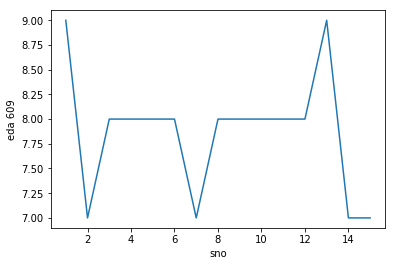

In [20]:
plt.plot(df["S.NO"],df["EDA 609"])
plt.xlabel("sno")
plt.ylabel("eda 609")
plt.show()

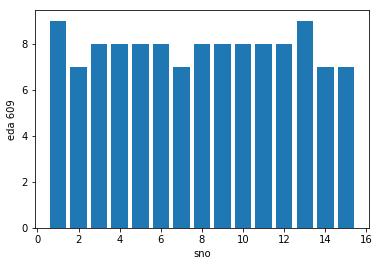

In [21]:
plt.bar(df["S.NO"],df["EDA 609"])
plt.xlabel("sno")
plt.ylabel("eda 609")
plt.show()

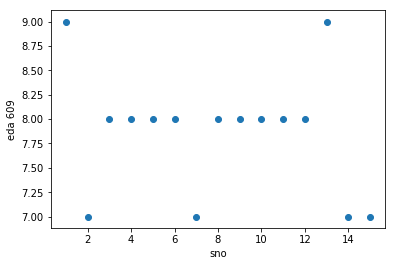

In [22]:
plt.scatter(df["S.NO"],df["EDA 609"])
plt.xlabel("sno")
plt.ylabel("eda 609")
plt.show()

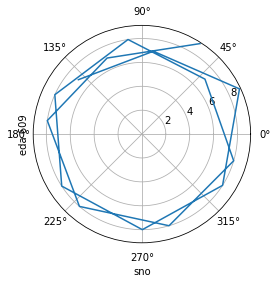

In [23]:
plt.polar(df["S.NO"],df["EDA 609"])
plt.xlabel("sno")
plt.ylabel("eda 609")
plt.show()

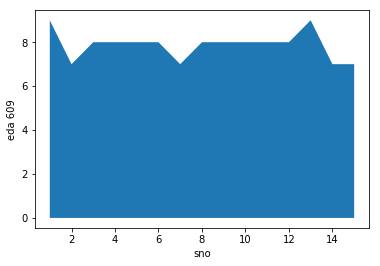

In [31]:
plt.stackplot(df["S.NO"],df["EDA 609"])
plt.xlabel("sno")
plt.ylabel("eda 609")
plt.show()

In [69]:
cur.execute("select * from demo")

In [70]:
cur.fetchall()

[(1, '1.61038e+008        ', 9.0, 10.0, 0.0, 4.0, 8.0, 0.0, 10.0, 9.0, 10.0, 9.0, 10.0, 8.0, 8.0, 6.760000229),
 (2, '1.61038e+008        ', 7.0, 9.0, 7.0, 7.0, 0.0, 7.0, 8.0, 9.0, 8.0, 9.0, 8.0, 8.0, 9.0, 7.760000229),
 (3, '1.61038e+008        ', 8.0, 9.0, 8.0, 7.0, 8.0, 0.0, 10.0, 9.0, 10.0, 9.0, 10.0, 8.0, 9.0, 8.359999657000001),
 (4, '1.61038e+008        ', 8.0, 9.0, 8.0, 4.0, 0.0, 8.0, 10.0, 9.0, 10.0, 10.0, 10.0, 8.0, 9.0, 7.559999942999999),
 (5, '1.61038e+008        ', 8.0, 10.0, 8.0, 8.0, 9.0, 0.0, 10.0, 9.0, 10.0, 10.0, 10.0, 8.0, 9.0, 8.880000114),
 (6, '1.61038e+008        ', 8.0, 10.0, 7.0, 8.0, 0.0, 8.0, 8.0, 10.0, 8.0, 10.0, 8.0, 8.0, 9.0, 8.319999695),
 (7, '1.61038e+008        ', 7.0, 10.0, 0.0, 8.0, 7.0, 0.0, 7.0, 10.0, 7.0, 10.0, 7.0, 8.0, 9.0, 7.1199998860000004),
 (8, '1.61038e+008        ', 8.0, 10.0, 7.0, 8.0, 0.0, 8.0, 9.0, 10.0, 9.0, 10.0, 9.0, 8.0, 9.0, 8.43999958),
 (9, '1.61038e+008        ', 8.0, 10.0, 7.0, 8.0, 8.0, 0.0, 9.0, 10.0, 9.0, 10.0, 9.0, 8.0, 9

In [52]:
list(cur.fetchall())

[]

In [56]:
dir(cur)


['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'arraysize',
 'cancel',
 'close',
 'columns',
 'commit',
 'connection',
 'description',
 'execute',
 'executemany',
 'fast_executemany',
 'fetchall',
 'fetchmany',
 'fetchone',
 'fetchval',
 'foreignKeys',
 'getTypeInfo',
 'nextset',
 'noscan',
 'primaryKeys',
 'procedureColumns',
 'procedures',
 'rollback',
 'rowIdColumns',
 'rowVerColumns',
 'rowcount',
 'setinputsizes',
 'setoutputsize',
 'skip',
 'statistics',
 'tables']